# Classification de photos de légumes

## Problèmatique

Le projet consiste à obtenir un modèle capable de classer une photo de légume.<br />

## Les données

Les données utilisées pour ce projet proviennent d'un dataset trouvé sur Kaggle.<br />
Source : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/data<br />
Le dataset a été téléchargé à la main au préalable, puis déposé dans le dossier resources.

## Modules

In [1]:
import nnz

w = nnz.Workspace()

In [2]:
# X_train, y_train, X_val, y_val, X_test, y_test = w.splitFolders("./resources/classes", "./resources", verbose=1, size_train=0.6, size_val=0.15, size_test=0.25, resize=(128,128))

In [3]:
w.get_classes()

,name,train_count,val_count,test_count
0,Bitter_Gourd,840,210,350
1,Cauliflower,840,210,350
2,Papaya,840,210,350
3,Tomato,840,210,350
4,Brinjal,840,210,350
5,Carrot,840,210,350
6,Capsicum,840,210,350
7,Potato,840,210,350
8,Bean,840,210,350
9,Bottle_Gourd,840,210,350


In [4]:
# Loader from dataset if exist
X_train, y_train, X_val, y_val, X_test, y_test = w.loadDatasetSplited(path_file='./resources/dataset.h5')
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_val : ", X_val.shape)
print("y_val : ", y_val.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

import numpy as np
from sklearn.preprocessing import LabelEncoder
y_train_encoder = LabelEncoder()
y_train = y_train_encoder.fit_transform(y_train)

y_val_encoder = LabelEncoder()
y_val = y_val_encoder.fit_transform(y_val)

y_test_encoder = LabelEncoder()
y_test = y_test_encoder.fit_transform(y_test)

X_train :  (12600, 128, 128, 3)
y_train :  (12600,)
X_val :  (3150, 128, 128, 3)
y_val :  (3150,)
X_test :  (5250, 128, 128, 3)
y_test :  (5250,)


## Normalisation des images

In [5]:
print('Avant normalisation X_train : Min={}, max={}'.format(X_train.min(),X_train.max()))
print('Avant normalisation X_val : Min={}, max={}'.format(X_val.min(),X_val.max()))
print('Avant normalisation X_test : Min={}, max={}'.format(X_test.min(),X_test.max()))

xmax_train = X_train.max()
xmax_val = X_val.max()
xmax_test = X_test.max()
X_train = X_train / xmax_train
X_val = X_val / xmax_val
X_test = X_test / xmax_test

print('Après normalisation X_train : Min={}, max={}'.format(X_train.min(),X_train.max()))
print('Après normalisation X_val : Min={}, max={}'.format(X_val.min(),X_val.max()))
print('Après normalisation X_test : Min={}, max={}'.format(X_test.min(),X_test.max()))

Avant normalisation X_train : Min=0, max=255
Avant normalisation X_val : Min=0, max=255
Avant normalisation X_test : Min=0, max=255
Après normalisation X_train : Min=0.0, max=1.0
Après normalisation X_val : Min=0.0, max=1.0
Après normalisation X_test : Min=0.0, max=1.0


## Visualisation des 10 premières images de chaque set

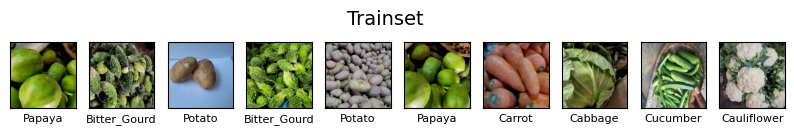

In [6]:
w.showImages(X_train, y=y_train, title="Trainset", classes=y_train_encoder.classes_)

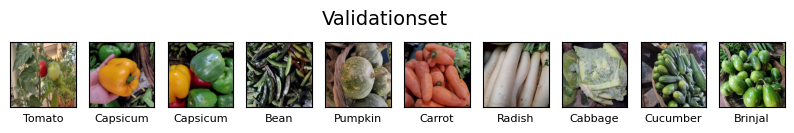

In [7]:
w.showImages(X_val, y=y_val, title="Validationset", classes=y_val_encoder.classes_)

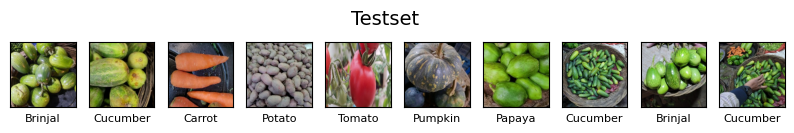

In [8]:
w.showImages(X_test, y=y_test, title="Testset", classes=y_test_encoder.classes_)

## Création du modèle

In [9]:
num_classes = len(y_train_encoder.classes_)

inputs = nnz.keras.layers.Input(shape=(128,128,3) )
x = nnz.keras.layers.Conv2D(512, (3,3),  activation='relu')(inputs)
x = nnz.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.keras.layers.Dropout(0.2)(x)

x = nnz.keras.layers.Conv2D(256, (3,3),  activation='relu')(x)
x = nnz.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.keras.layers.Dropout(0.2)(x)

x = nnz.keras.layers.Conv2D(128, (3,3),  activation='relu')(x)
x = nnz.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.keras.layers.Dropout(0.2)(x)

x = nnz.keras.layers.Conv2D(64, (3,3),  activation='relu')(x)
x = nnz.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.keras.layers.Dropout(0.2)(x)

x = nnz.keras.layers.Conv2D(32, (3,3),  activation='relu')(x)
x = nnz.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.keras.layers.Dropout(0.2)(x)

x = nnz.keras.layers.Flatten()(x)
x = nnz.keras.layers.Dense(512, activation='relu')(x)
x = nnz.keras.layers.Dropout(0.5)(x)

output = nnz.keras.layers.Dense(num_classes, activation="softmax")(x)
model = nnz.keras.models.Model(inputs,output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,655,279 (6.31 MB)

 Trainable params: 1,655,279 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
import gc
gc.collect()
nnz.torch.cuda.empty_cache()

name_model = 'test'

history = w.fitModel(model, X_train, y_train, X_val, y_val, name=name_model, epochs=3, batch_size=32)

Epoch 1/3
394/394 ━━━━━━━━━━━━━━━━━━━━ 96s 242ms/step - accuracy: 0.1453 - loss: 2.4477 - val_accuracy: 0.3905 - val_loss: 1.6545
Epoch 2/3
394/394 ━━━━━━━━━━━━━━━━━━━━ 96s 242ms/step - accuracy: 0.4673 - loss: 1.5047 - val_accuracy: 0.6013 - val_loss: 1.1127
Epoch 3/3
394/394 ━━━━━━━━━━━━━━━━━━━━ 96s 242ms/step - accuracy: 0.5841 - loss: 1.1904 - val_accuracy: 0.6775 - val_loss: 0.9159


In [12]:
# w.save(model, f"./runtime/{nnz.tools.get_format_date(pattern="%d_%m_%Y_%H_%M_%S")}.model")
# w.save(history, f"./runtime/{nnz.tools.get_format_date(pattern="%d_%m_%Y_%H_%M_%S")}.history")
score = model.evaluate(X_test, y_test, verbose=1)

w.loadSummaryModel(name_model)
loaded_model = w.loadModel(name_model)
# # history = w.load("./runtime/02_06_2024_19_04_36.history")

score = loaded_model.evaluate(X_test, y_test, verbose=1)
# print(model.history())

# print(f'Test loss     : {score[0]:4.4f}')
# print(f'Test accuracy : {score[1]:4.4f}')


165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.6779 - loss: 0.9209


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,965,839 (18.94 MB)

 Trainable params: 1,655,279 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,310,560 (12.63 MB)

165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.6779 - loss: 0.9209


In [13]:
import pandas as pd
log_data = pd.read_csv('./runtime/test.history.log', sep=',', engine='python')
log_data

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.235476,2.142299,0.390476,1.654458
1,1,0.502540,1.406177,0.601270,1.112723
2,2,0.609286,1.114765,0.677460,0.915880


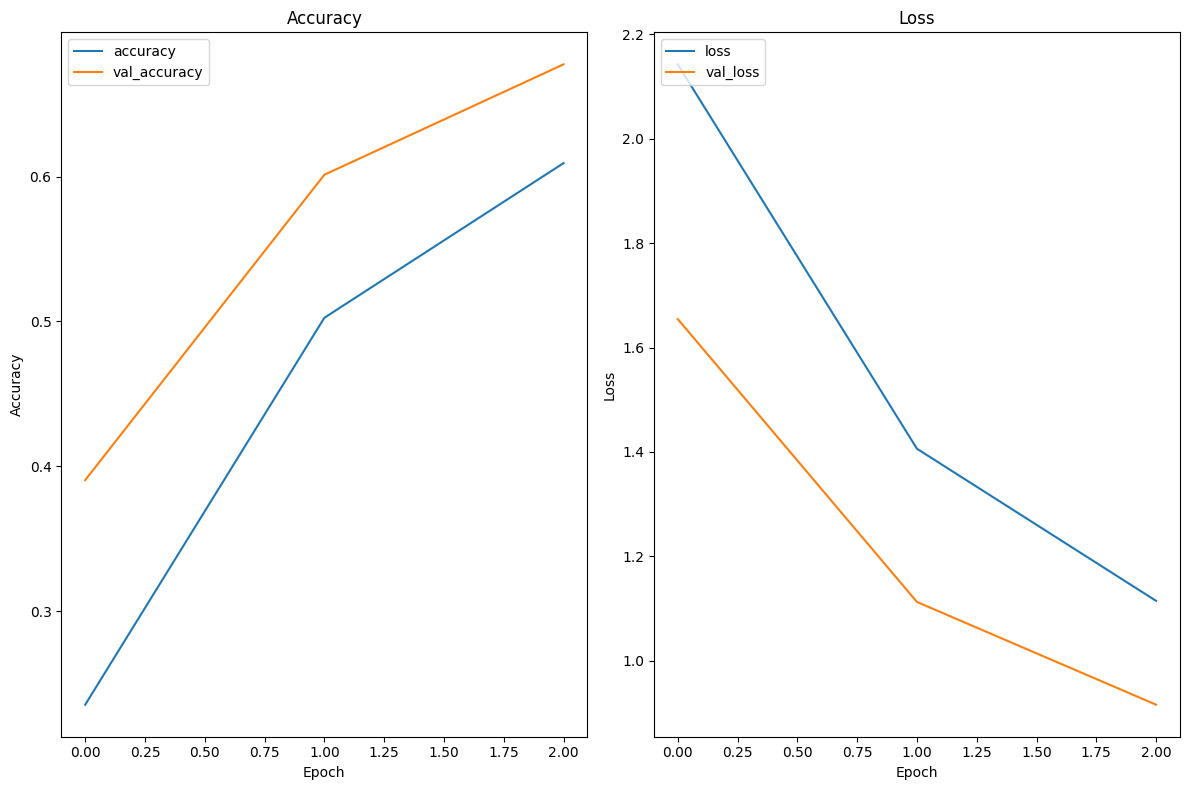

In [14]:
w.showMetrics(name=name_model)

In [15]:
y_sigmoid = model.predict(X_test, verbose=1)
y_pred    = np.argmax(y_sigmoid, axis=-1)
print(y_pred)
model.predict(X_test, verbose=1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step
[ 5  5  7 ... 14  7  7]
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step


array([[3.6597010e-02, 1.7918025e-01, 3.5969859e-03, ..., 1.1469068e-02,
        4.3926155e-03, 3.4614697e-02],
       [3.3964790e-02, 6.8139859e-02, 1.1420514e-02, ..., 3.1284202e-02,
        2.4772554e-03, 6.4759962e-02],
       [9.0592348e-06, 2.2578293e-05, 1.2556330e-06, ..., 7.4333354e-04,
        3.8648793e-04, 3.5267282e-02],
       ...,
       [1.4453599e-06, 2.2347722e-07, 1.0267694e-08, ..., 3.6771191e-04,
        1.3415765e-05, 6.6969728e-01],
       [1.9251191e-05, 1.6354425e-05, 1.7377586e-06, ..., 6.3140714e-04,
        4.3245903e-04, 2.4038019e-02],
       [8.3906764e-07, 1.1020461e-06, 3.8146524e-08, ..., 1.4337769e-04,
        1.3554088e-05, 7.7025637e-02]], dtype=float32)

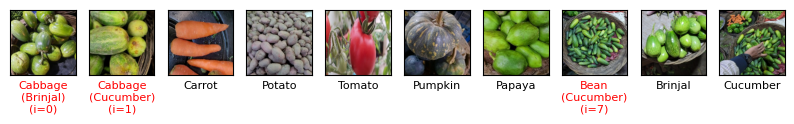

In [16]:
w.showImages(X_test, y=y_test, indices=range(0,100), y_pred=y_pred, classes=y_test_encoder.classes_)

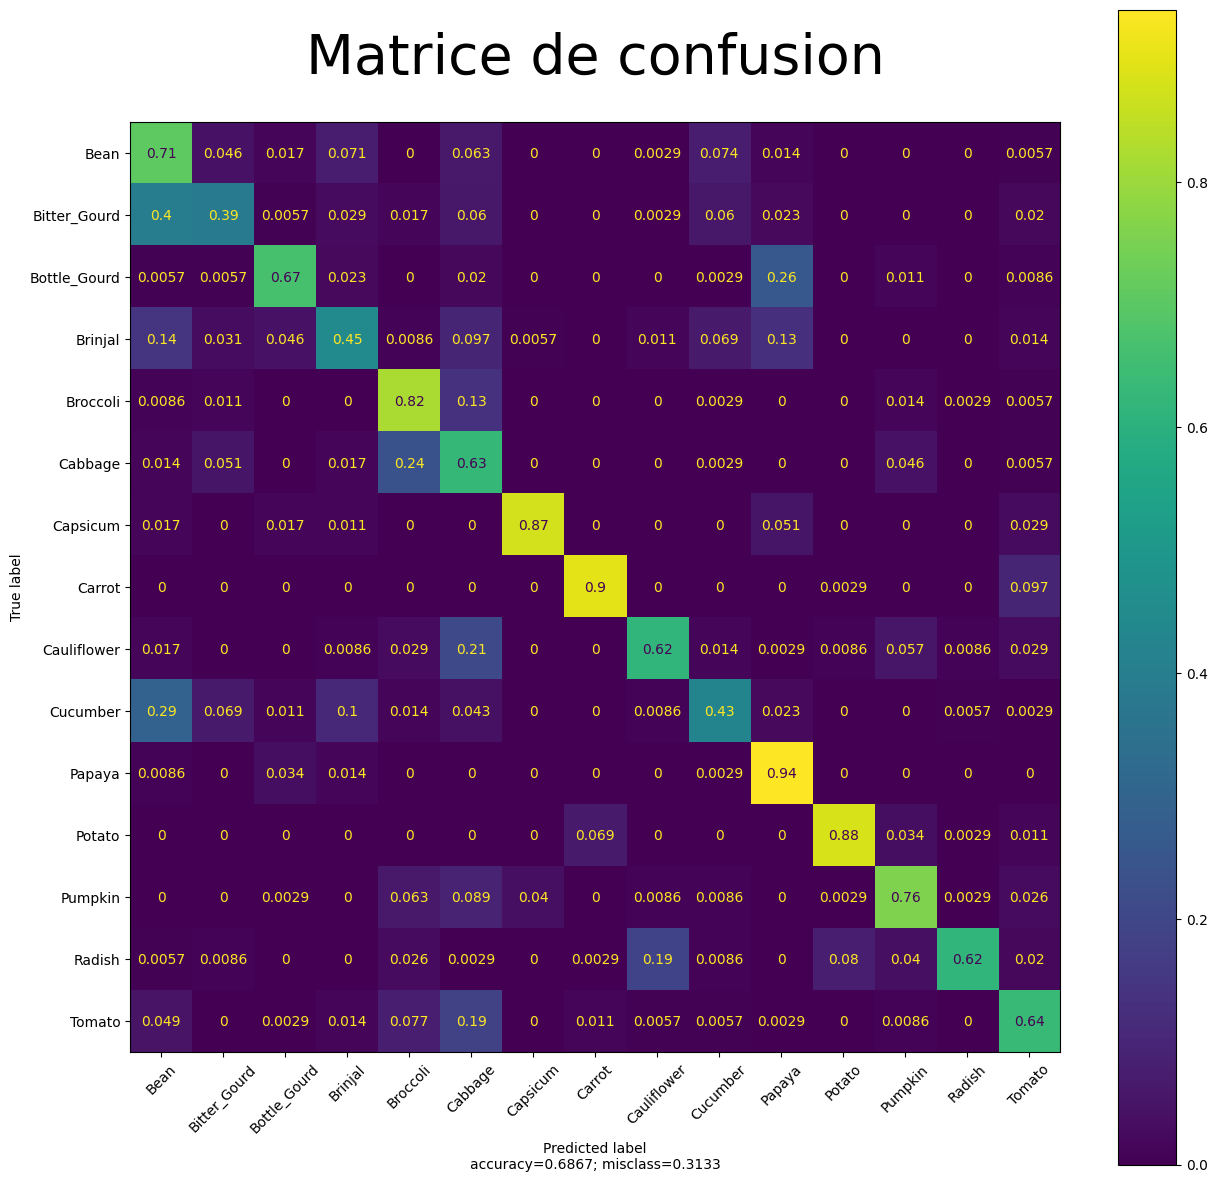

,accuracy,precision,recall,f1
Bean,0.686667,0.424399,0.705714,0.530043
Bitter_Gourd,0.686667,0.633803,0.385714,0.479574
Bottle_Gourd,0.686667,0.829181,0.665714,0.738510
Brinjal,0.686667,0.604651,0.445714,0.513158
Broccoli,0.686667,0.634956,0.820000,0.715711
Cabbage,0.686667,0.409346,0.625714,0.494915
Capsicum,0.686667,0.950311,0.874286,0.910714
Carrot,0.686667,0.915698,0.900000,0.907781
Cauliflower,0.686667,0.729730,0.617143,0.668731
Cucumber,0.686667,0.628692,0.425714,0.507666


In [17]:
w.confusionMatrix(y_test, y_pred, y_test_encoder.classes_)

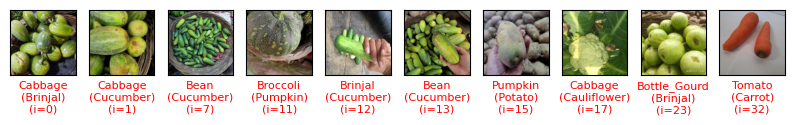

In [18]:
w.showPredictionsErrors(X_test, y_test , y_pred, classes=y_test_encoder.classes_)

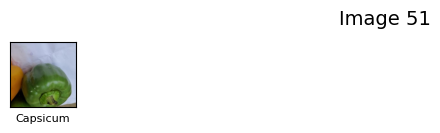

In [20]:
w.showImages(X_test, y=y_test, indices=[50], title="Image 51", classes=y_test_encoder.classes_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
conv2d (5292, 1512)
conv2d_1 (1281, 732)
conv2d_2 (280, 336)
conv2d_3 (60, 144)
conv2d_4 (8, 48)


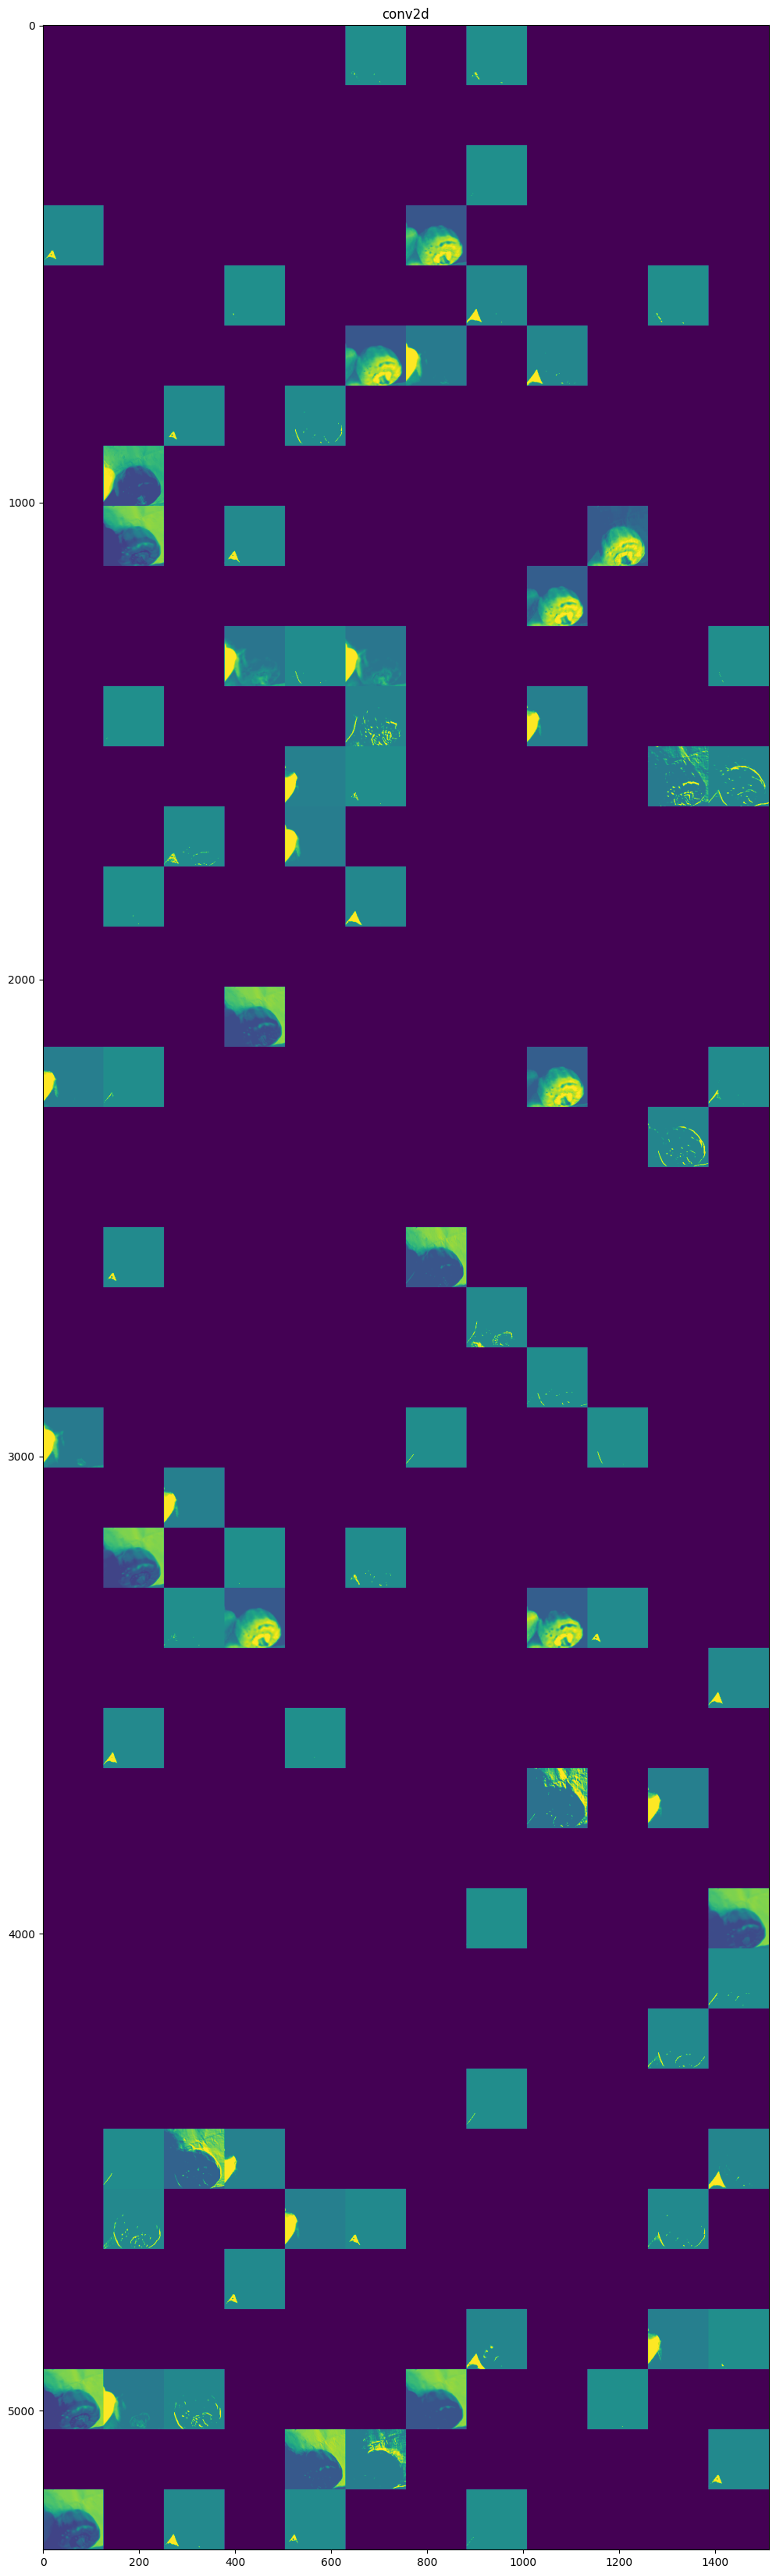

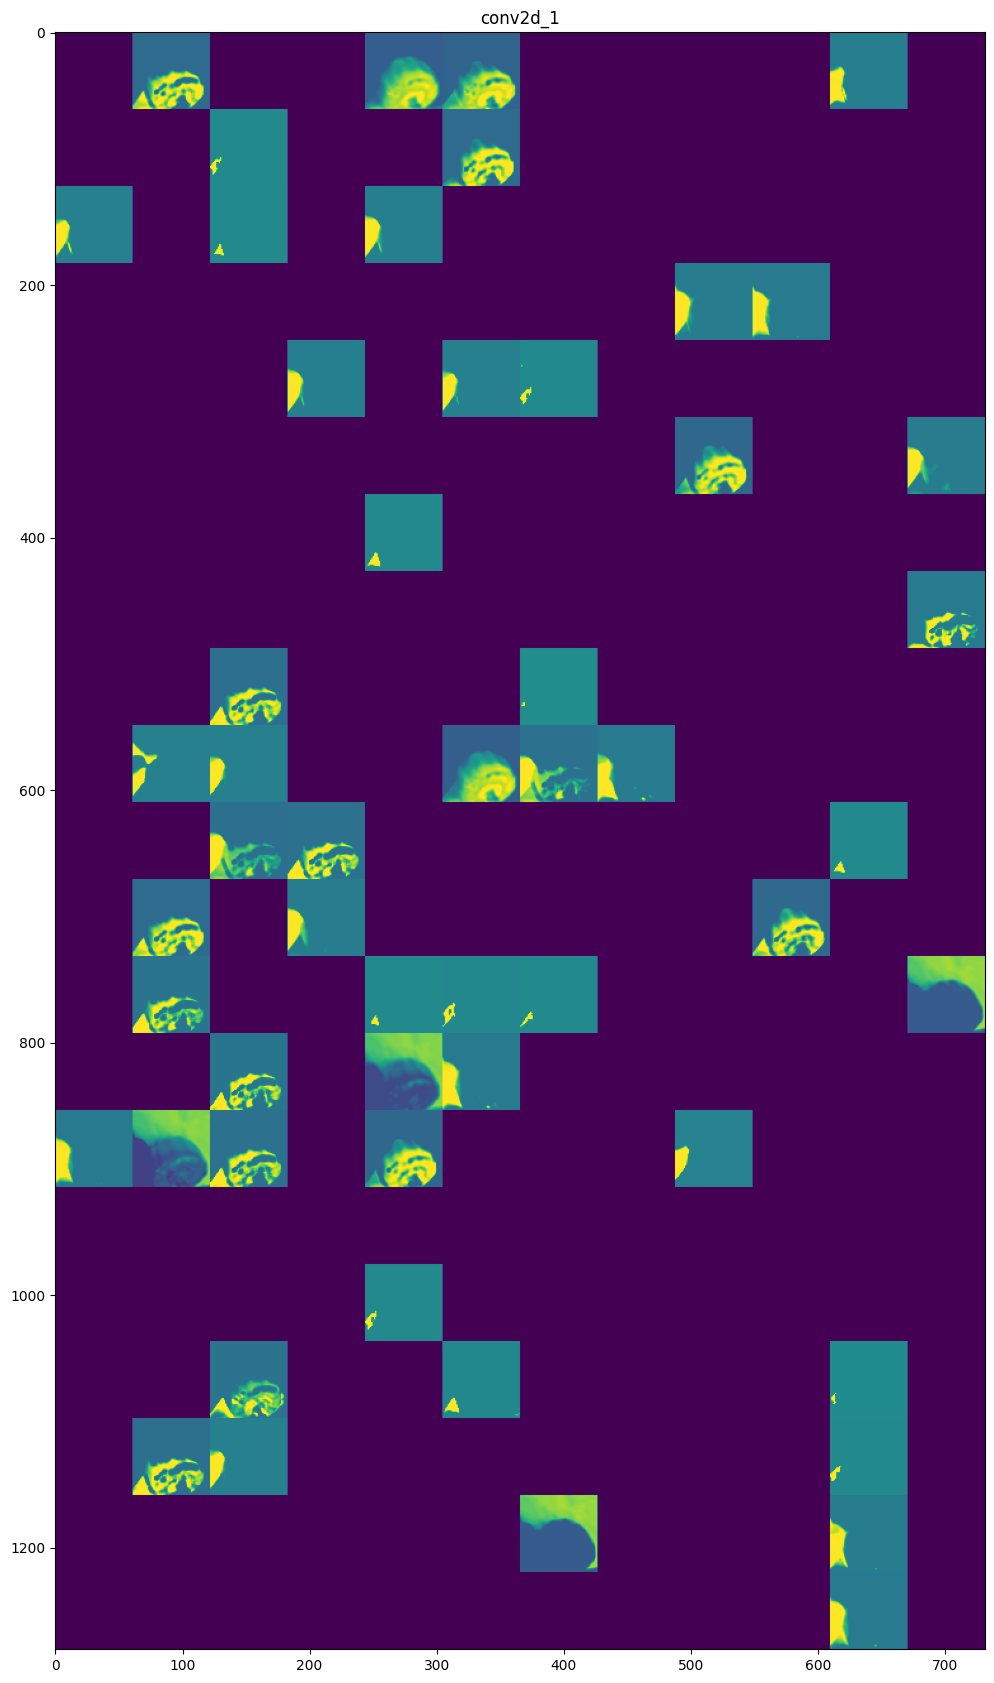

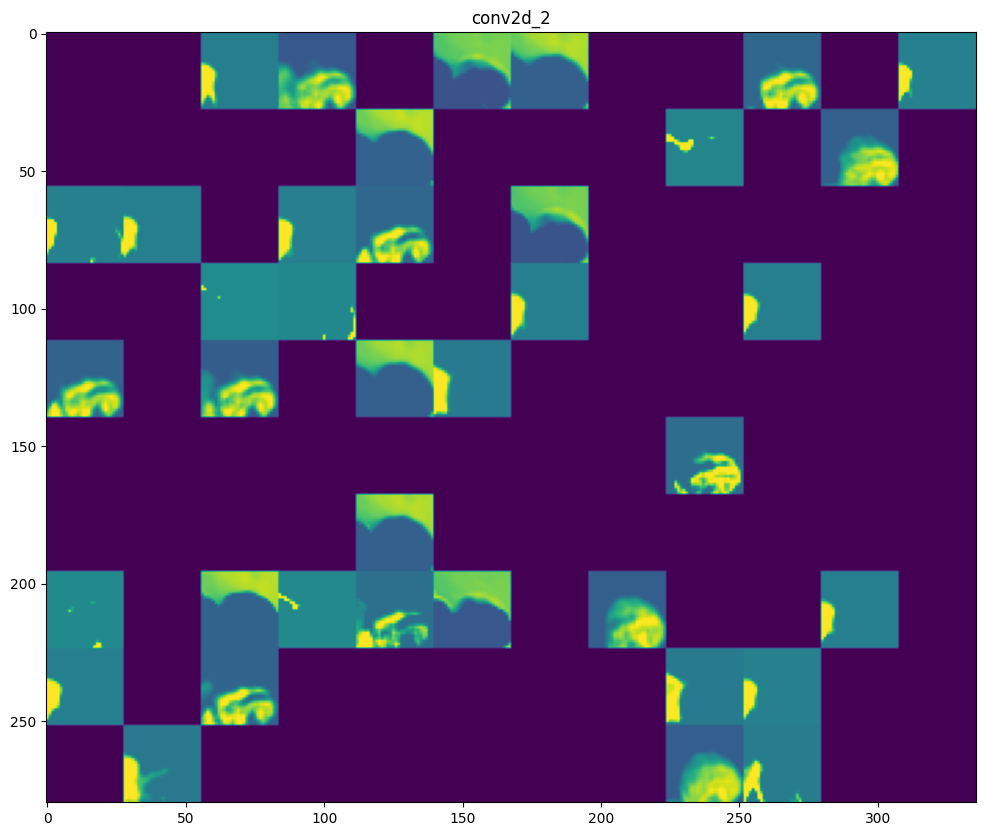

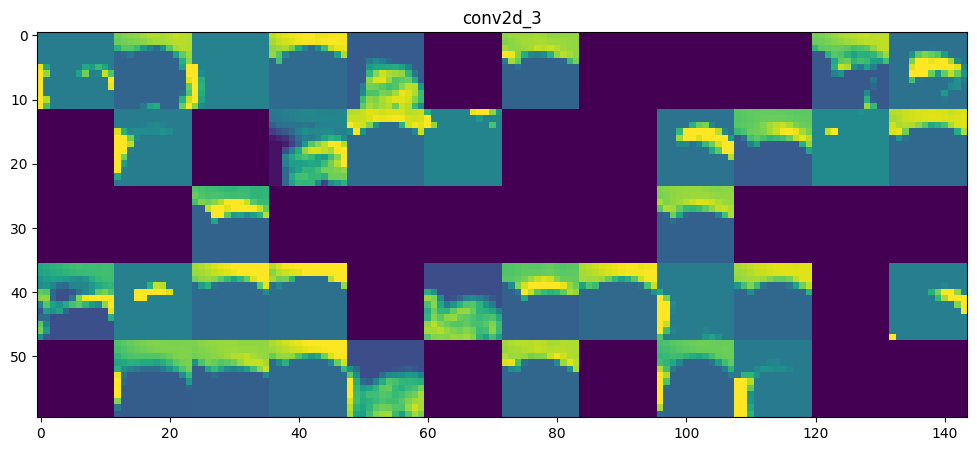

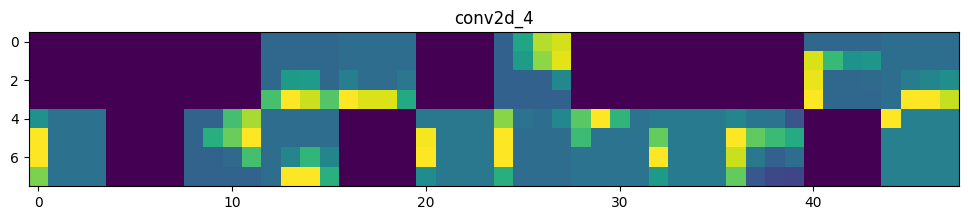

In [23]:
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers]
activation_model = nnz.keras.models.Model(inputs=model.input,outputs=layer_outputs)

img = X_test[50].reshape(1,128,128,3)
activations = activation_model.predict(img)

layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)

images_per_row = 12

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    if "conv" not in layer_name:
        continue
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    print(layer_name, (size * n_cols, images_per_row * size))
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[...,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')



# first_layer_activation = activations[1]
# print(first_layer_activation.shape)


# plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')
